In [58]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
from sklearn.model_selection import StratifiedKFold

In [391]:
#read in data. Excel file has 3 sheets for pos, neg, and control
all_data = pd.ExcelFile("TCR_V copy.xlsx")
pos = pd.read_excel(all_data, "pos")
neg = pd.read_excel(all_data, "neg")
ctrls = pd.read_excel(all_data, "controls")
alldata_frame = pd.read_excel(all_data, "all")
print(alldata_frame.shape)
alldata = alldata_frame.to_numpy()[:,1:]
n = alldata[0:25,:]
p = alldata[26:49,:]
c = alldata[50:,:]
df = alldata_frame.drop(alldata_frame.columns[[0]], axis=1)
print(df)

(74, 56)
    TRBV1-1  TRBV2-1  TRBV3-1  TRBV4-1  TRBV4-2  TRBV4-3  TRBV5-1  TRBV5-3  \
0      0.06     6.12     3.72     3.72     1.76     0.00     6.54     0.17   
1      0.05     7.31     4.27     2.88     1.32     0.00     6.45     0.18   
2      0.04     8.36     3.88     2.96     0.94     0.90     7.16     0.02   
3      0.11     5.71     3.60     3.74     4.07     3.93     4.15     0.14   
4      0.03     5.53     3.29     2.34     0.92     0.00     5.76     0.13   
..      ...      ...      ...      ...      ...      ...      ...      ...   
69     0.03     5.94     3.31     2.04     1.29     0.00     7.20     0.13   
70     0.12     5.81     2.50     1.40     1.28     2.38     6.22     0.00   
71     0.07     4.21     3.34     2.21     0.66     3.17     3.93     0.07   
72     0.11     6.17     3.05     1.88     1.20     1.58     6.69     0.04   
73     0.10     5.50     4.01     2.38     1.63     0.00     6.06     0.05   

    TRBV5-4  TRBV5-5  ...  TRBV19-1  TRBV20-1  TRBV21-

In [378]:
print("Positive: " ,len(p), p.shape, "\nNegative: ", len(n), n.shape, "\nControls: ",len(c), c.shape)

Positive:  23 (23, 55) 
Negative:  25 (25, 55) 
Controls:  24 (24, 55)


In [270]:
X = np.concatenate((pos.to_numpy()[:,1:],neg.to_numpy()[:,1:],ctrls.to_numpy()[:,1:]), axis = 0)

In [132]:
y = np.array([0]*len(pos) + [1]*len(neg) + [2]*len(ctrls))

In [133]:
skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "\nTEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    print("\n")
    y_train, y_test = y[train_index], y[test_index]
    clf = LinearDiscriminantAnalysis()
    clf.fit(X_train, y_train)
    print("--------")
    print(clf.score(X_test,y_test))
    print("--------")

TRAIN: [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73] 
TEST: [ 0  1  2  3  4 24 25 26 27 28 49 50 51 52 53]


--------
0.13333333333333333
--------
TRAIN: [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73] 
TEST: [ 5  6  7  8  9 29 30 31 32 33 54 55 56 57 58]


--------
0.4666666666666667
--------
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 64 65 66 67 68 69 70 71 72 73] 
TEST: [10 11 12 13 14 34 35 36 37 38 59 60 61 62 63]


--------
0.4666666666666667
--------
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58

In [134]:
p = pos.to_numpy()[:,1:]
n = neg.to_numpy()[:,1:]
c = ctrls.to_numpy()[:,1:]
categories = [p, n, c]
test_set = []
train_set = []
test_values = []
train_values = []
for curr in range(len(categories)):
    test = np.random.choice(len(categories[curr]),19,replace=False)
    train = [x for x in range(len(curr)) if x not in test_set]
    train_vals = [curr] * (len(categories[curr])-len(test))
    test_vals = np.take(categories[curr], test, axis = 0)
    for a in test_vals:
        test_set.append(a)
    for a in test_vals
    train_set += (train)

SyntaxError: invalid syntax (<ipython-input-134-848095a32d2c>, line 16)

In [177]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import umap

ImportError: Numba requires at least version 0.33.0 of llvmlite.
Installed version is 0.31.0.
Please update llvmlite.

In [240]:
pos_data = pos.drop(pos.columns[0], axis=1)
neg_data = neg.drop(neg.columns[0], axis =1)
data = pd.concat([pos_data,neg_data], ignore_index=True)

In [209]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [383]:
kmeans = KMeans(n_clusters=2).fit(alldata)
labels = kmeans.labels_
x = np.c_[alldata,labels]
r = pd.DataFrame(x)
#labeledData = pd.concat([data,labels],axis=1)#labeledData = labeledData.rename({0:'labels'},axis=1)

[[0.06 6.12 3.72 ... 2.37 2.35 3.13]
 [0.05 7.31 4.27 ... 2.23 1.63 2.54]
 [0.04 8.36 3.88 ... 5.0 1.46 3.48]
 ...
 [0.07 4.21 3.34 ... 0.24 2.07 3.21]
 [0.11 6.17 3.05 ... 1.28 1.99 3.05]
 [0.1 5.5 4.01 ... 4.23 2.12 1.54]]


In [352]:
print(labels)

[1 0 2 0 1 0 1 2 2 1 0 1 0 0 2 2 0 1 1 0 1 2 0 2 1 2 0 1 2 2 1 0 1 2 2 0 2
 2 2 2 0 1 1 1 0 2 1 1 2 1 2 2 1 2 1 1 1 0 0 2 2 0 2 0 2 2 2 1 0 2 2 0 0 2]


In [360]:
df = pd.DataFrame(x)
df.columns = df.columns.astype(str)
df.columns.values[-1] = "labels"
print(df)

       0     1     2     3     4     5     6     7     8     9  ...     46  \
0   0.06  6.12  3.72  3.72  1.76     0  6.54  0.17  2.63  1.15  ...   8.35   
1   0.05  7.31  4.27  2.88  1.32     0  6.45  0.18  3.34  1.37  ...  10.83   
2   0.04  8.36  3.88  2.96  0.94   0.9  7.16  0.02  0.78  1.02  ...    7.7   
3   0.11  5.71   3.6  3.74  4.07  3.93  4.15  0.14  2.14  0.99  ...   8.85   
4   0.03  5.53  3.29  2.34  0.92     0  5.76  0.13   2.8  1.15  ...   7.47   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
69  0.03  5.94  3.31  2.04  1.29     0   7.2  0.13  2.12  0.91  ...   6.99   
70  0.12  5.81   2.5   1.4  1.28  2.38  6.22     0  2.33  0.87  ...   7.38   
71  0.07  4.21  3.34  2.21  0.66  3.17  3.93  0.07  1.66  0.86  ...  12.79   
72  0.11  6.17  3.05  1.88   1.2  1.58  6.69  0.04  1.84  1.28  ...   8.72   
73   0.1   5.5  4.01  2.38  1.63     0  6.06  0.05  2.45  0.67  ...  10.75   

      47    48    49    50    51    52    53    54 labels  
0  

/Users/akshayaanand/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/akshayaanand/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/akshayaanand/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/akshayaanand/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


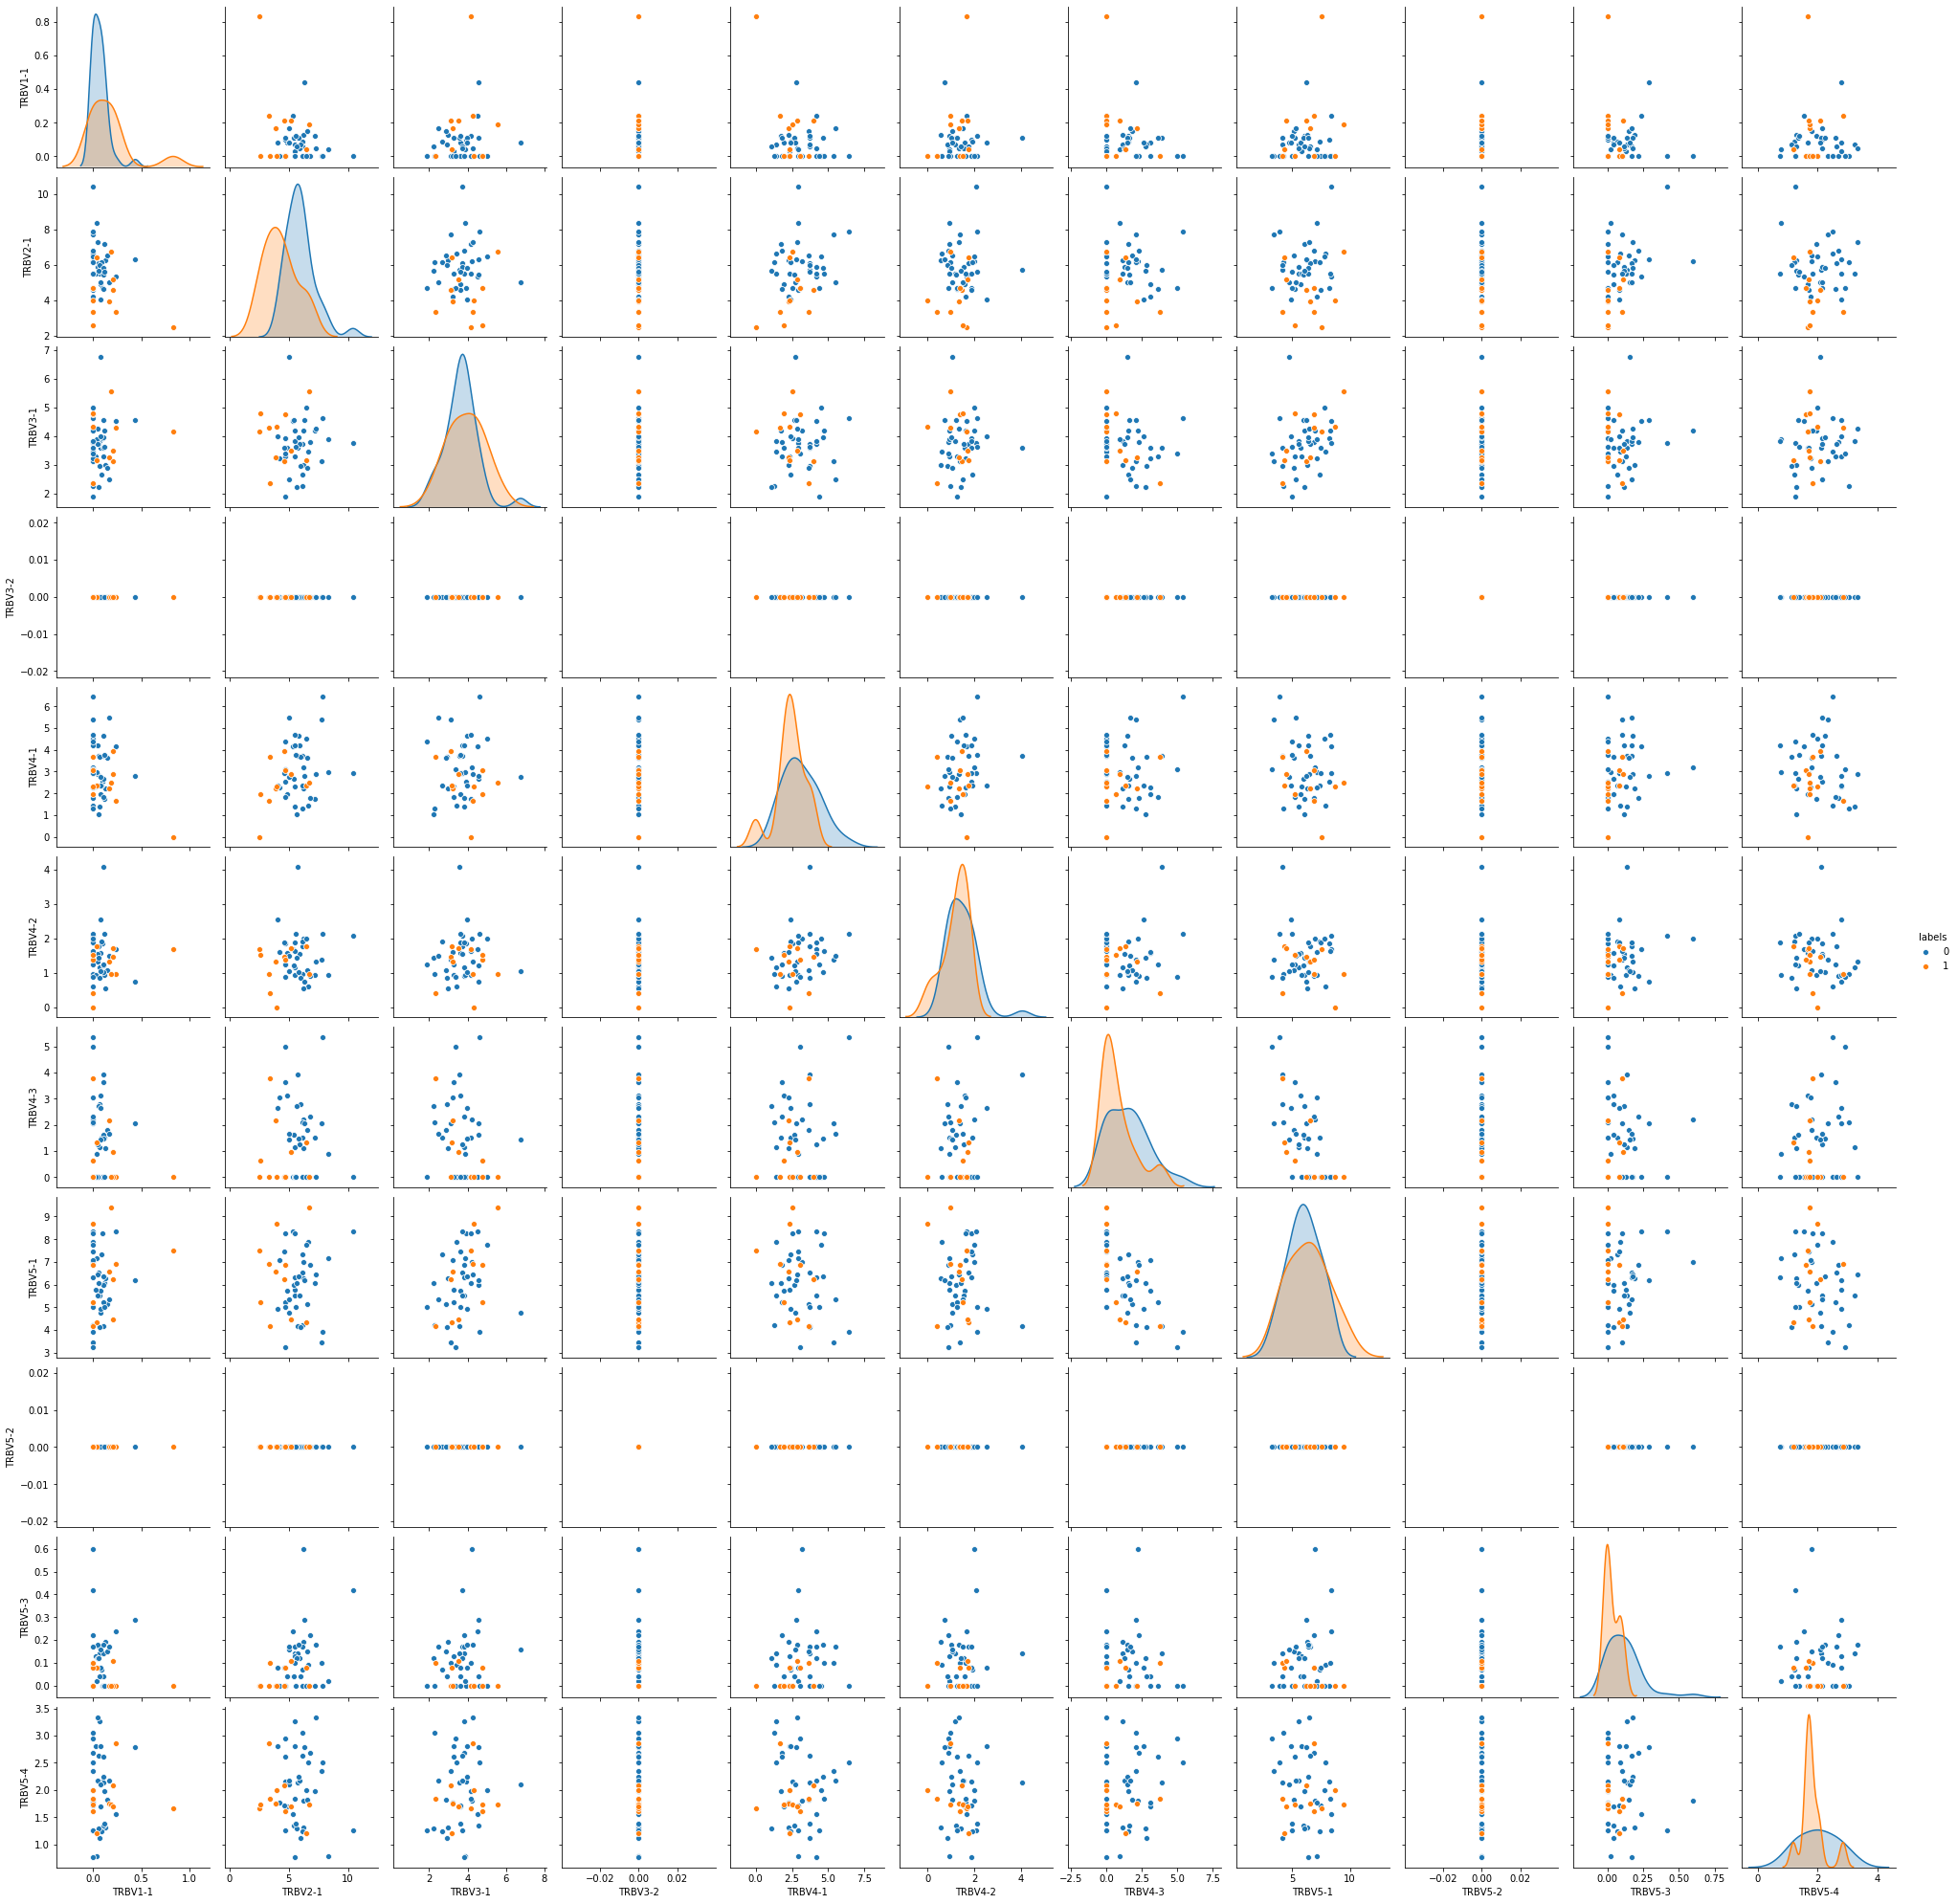

In [330]:
sns.pairplot(data.iloc[:,0:12,], hue="labels")

In [355]:
r = data.drop(["TRBV3-2", "TRBV5-2","TRBV6-3", "TRBV7-1", "TRBV12-4", "TRBV17-1", "TRBV26-1"], axis=1)

[[0.07 5.51 3.84 ... 2.68 2.32 3.19]
 [0.08 4.89 3.61 ... 3.57 1.99 4.7 ]
 [0.24 3.33 4.29 ... 3.33 2.38 2.62]
 ...
 [0.   4.71 3.38 ... 1.03 2.06 3.68]
 [0.12 5.62 3.62 ... 4.12 2.75 1.25]
 [0.   4.69 1.88 ... 1.25 2.5  3.12]]


In [359]:
kmeans = KMeans(n_clusters=2).fit(r.to_numpy()[:,1:])
labels = kmeans.labels_
print(labels)

[1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 0 1]


In [364]:
m = pd.DataFrame(x)